# Решение оптимизацияонных задач в SciPy

In [96]:
from scipy import optimize

Привет


In [25]:
def f(x): # Функция rosenbroch - имеет минимум в точке 1,1
    return .5*(1 -x[0])**2 + (x[1] - x[0]**2)**2

print f([1, 1])

0.0


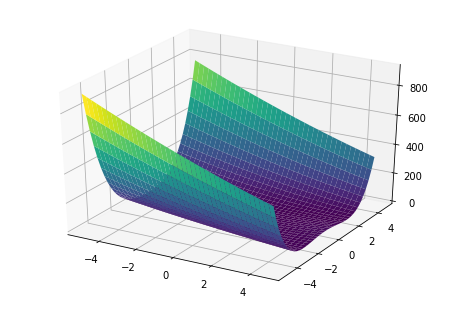

In [71]:
# Нарисуем функцию
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
for i in  range(len(X)):
    for j in  range(len(Y)):
        R[i,j] = f([X[i],Y[j]])
Z = np.array(R)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

In [95]:
print X[3:4]

[[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
  -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
   4.    4.25  4.5   4.75]]


In [76]:
%time result = optimize.brute(f, ((-5,5), (-5,5))) # Перебор
print result

Wall time: 6 ms
[0.99999324 1.00001283]


In [78]:
%time print optimize.differential_evolution(f, ((-5, 5), (-5, 5))) 
# Генетический алгоритм => 114 итераций получилось

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3453
     nit: 114
 success: True
       x: array([1., 1.])
Wall time: 140 ms


In [80]:
def g(x): # Градиент
    return np.array((-2*.5*(1-x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [81]:
print optimize.check_grad(f,g, [2,2]) # Проверяем, что градиент задан верно

2.384185791015625e-07


In [84]:
%time print optimize.fmin_bfgs(f, [2,2], fprime = g) 
# Метод БФГС - 8 итераций получилось

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
[1.00000582 1.00001285]
Wall time: 4 ms


In [85]:
%time print optimize.minimize(f, [2,2]) 
# Если градиент нужен, функция сама его оценит - для хороших функций будет использовать метод BFGS

      fun: 1.7837922314048395e-11
 hess_inv: array([[0.95489065, 1.90006641],
       [1.90006641, 4.27872401]])
      jac: array([9.88094926e-07, 2.41748031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])
Wall time: 3 ms


In [87]:
%time print optimize.minimize(f, [2,2], method='BFGS', jac=g) 
# Указываем метод BFGS и передаем градиент 

      fun: 1.8414093407262628e-11
 hess_inv: array([[0.95489113, 1.90006768],
       [1.90006768, 4.27872719]])
      jac: array([9.88085521e-07, 2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000582, 1.00001285])
Wall time: 2 ms


In [88]:
%time print optimize.minimize(f, [2,2], method='BFGS') 
# Указываем метод BFGS, можно не передавать градиент - совпадает с минимайз без параметров

      fun: 1.7837922314048395e-11
 hess_inv: array([[0.95489065, 1.90006641],
       [1.90006641, 4.27872401]])
      jac: array([9.88094926e-07, 2.41748031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])
Wall time: 3 ms


In [90]:
%time print optimize.minimize(f, [2,2], method='Nelder-Mead') # Метод Нелдера Миад

 final_simplex: (array([[0.99998568, 0.99996682],
       [1.00002149, 1.00004744],
       [1.0000088 , 1.00003552]]), array([1.23119954e-10, 2.50768082e-10, 3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.99998568, 0.99996682])
Wall time: 3 ms
